In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from itertools import product
from util.scrape_log import scrape_search_log
from dataset.goose_domain_info import GOOSE_DOMAINS as DOMAINS
from dataset.goose_domain_info import get_domain_instance_pddl_for_domain

In [2]:
_LOG_DIR = "aaai24_logs/test"
pd.options.display.float_format = "{:,.2f}".format

In [3]:
os.system("sh collect_cluster1_logs.sh")

aaai24_logs/test/blocks15-task01_di_llg_blocks_L16_H64_max_p20.log
aaai24_logs/test/blocks15-task01_di_llg_blocks_L16_H64_mean_p20.log
aaai24_logs/test/blocks15-task02_di_llg_blocks_L16_H64_max_p20.log
aaai24_logs/test/blocks15-task02_di_llg_blocks_L16_H64_mean_p20.log
aaai24_logs/test/blocks15-task03_di_llg_blocks_L16_H64_max_p20.log
aaai24_logs/test/blocks15-task03_di_llg_blocks_L16_H64_mean_p20.log
aaai24_logs/test/blocks15-task04_di_llg_blocks_L16_H64_max_p20.log
aaai24_logs/test/blocks15-task04_di_llg_blocks_L16_H64_mean_p20.log
aaai24_logs/test/blocks15-task05_di_llg_blocks_L16_H64_max_p20.log
aaai24_logs/test/blocks15-task05_di_llg_blocks_L16_H64_mean_p20.log
aaai24_logs/test/blocks20-task01_di_llg_blocks_L16_H64_max_p20.log
aaai24_logs/test/blocks20-task01_di_llg_blocks_L16_H64_mean_p20.log
aaai24_logs/test/blocks20-task02_di_llg_blocks_L16_H64_max_p20.log
aaai24_logs/test/blocks20-task02_di_llg_blocks_L16_H64_mean_p20.log
aaai24_logs/test/blocks20-task03_di_llg_blocks_L16_H64_

0

In [4]:
# ...goose-aaai24/learner/aaai24_logs/test/blocks15-task01_dd_llg_blocks_L4_H64_max_p10.log
MODELS = list(
    product(
        ["di", "dd"],
        ["dlg", "slg", "flg", "llg"],
        [
            4,
            8,
            12,
            16,
        ],
        ["mean", "max"],
    )
)
DOMAINS = sorted(DOMAINS)

In [5]:
data = {
    "training": [],
    "graph": [],
    "layers": [],
    "aggr": [],
    "domain": [],
    "problem": [],
    "solved": [],
    "number": [],
    "expanded": [],
    "evaluated": [],
    "time": [],
    "cost": [],
    "first_h": [],
    "tried": [],
    "normaliser": [],
}

for model, domain in product(MODELS + ["shgn", "blind", "hff"], DOMAINS):
    for i, (_, _, pf) in enumerate(get_domain_instance_pddl_for_domain(domain, "test")):
        problem_name = os.path.basename(pf).replace(".pddl", "")

        if model in {"shgn", "blind", "hff"}:
            training, aggr, layers = "", "", ""
            rep = model
            log_file = "_".join([domain, problem_name])
            log_file = f"aaai24_logs/{model}/{log_file}.log"
            assert os.path.exists(log_file), log_file
            stats = scrape_search_log(log_file)
        elif model[1] == "llg":
            (training, rep, layers, aggr) = model
            log_file = "_".join([problem_name, training, rep, domain, f"L{layers}", "H64", aggr, "p10" if training == "dd" else "p20"])
            log_file = f"{_LOG_DIR}/{log_file}.log"
            stats = scrape_search_log(log_file)
        else:
            (training, rep, layers, aggr) = model
            log_file = f"../../aaai-24-goose-logs/goose-submission/{aggr}_{rep}_{training}_{layers}/{domain}_{problem_name}.log"
            stats = scrape_search_log(log_file)

        data["training"].append(training)
        data["graph"].append(rep)
        data["layers"].append(layers)
        data["aggr"].append(aggr)
        data["domain"].append(domain)
        data["number"].append(len(os.listdir(f"../dataset/goose/{domain}/test")))
        data["problem"].append(problem_name)
        data["normaliser"].append((1/90) if domain!="gripper" else (1/18))

        assert len(data) - 8 == len(stats)
        for k in stats:
            data[k].append(stats[k])

WHOLE_DF = pd.DataFrame(data=data)
WHOLE_DF

../../aaai-24-goose-logs/goose-submission/max_flg_di_4/n-puzzle_n-puzzle-8x8-s6.log
../../aaai-24-goose-logs/goose-submission/mean_flg_dd_16/ferry_p-l15-c15-s1.log
../../aaai-24-goose-logs/goose-submission/mean_flg_dd_16/ferry_p-l15-c15-s2.log
../../aaai-24-goose-logs/goose-submission/mean_flg_dd_16/ferry_p-l15-c15-s3.log
../../aaai-24-goose-logs/goose-submission/mean_flg_dd_16/ferry_p-l15-c15-s4.log
../../aaai-24-goose-logs/goose-submission/mean_flg_dd_16/ferry_p-l15-c15-s5.log


,training,graph,layers,aggr,domain,problem,solved,number,expanded,evaluated,time,cost,first_h,tried,normaliser
0,di,dlg,4,mean,blocks,blocks15-task01,0,90,-1,-1,-1.00,-1,-1,1,0.01
1,di,dlg,4,mean,blocks,blocks15-task02,0,90,-1,-1,-1.00,-1,-1,1,0.01
2,di,dlg,4,mean,blocks,blocks15-task03,0,90,-1,-1,-1.00,-1,-1,1,0.01
3,di,dlg,4,mean,blocks,blocks15-task04,0,90,-1,-1,-1.00,-1,-1,1,0.01
4,di,dlg,4,mean,blocks,blocks15-task05,0,90,-1,-1,-1.00,-1,-1,1,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40731,,hff,,,visitsome,n100-s0,0,90,-1,-1,-1.00,-1,8591,1,0.01
40732,,hff,,,visitsome,n100-s1,0,90,-1,-1,-1.00,-1,8591,1,0.01
40733,,hff,,,visitsome,n100-s2,0,90,-1,-1,-1.00,-1,8395,1,0.01
40734,,hff,,,visitsome,n100-s3,0,90,-1,-1,-1.00,-1,8457,1,0.01


In [6]:
for domain in DOMAINS:
    df = WHOLE_DF.copy()
    df = df[df["solved"] == 1]
    df = df[df["domain"] == domain]
    df = df[df["graph"].isin({"llg", "slg", "flg"})]
    probs = df.problem.values
    probs = sorted(list(set(probs)))
    print(domain)
    print(probs)

blocks
['blocks15-task01', 'blocks15-task02', 'blocks15-task03', 'blocks15-task04', 'blocks15-task05', 'blocks20-task01', 'blocks20-task02', 'blocks20-task03', 'blocks20-task04', 'blocks20-task05', 'blocks25-task01', 'blocks25-task02', 'blocks25-task03', 'blocks25-task04', 'blocks25-task05', 'blocks30-task01', 'blocks30-task02', 'blocks30-task03', 'blocks30-task04', 'blocks30-task05', 'blocks35-task01', 'blocks35-task02', 'blocks35-task03', 'blocks35-task04', 'blocks35-task05', 'blocks40-task01', 'blocks40-task02', 'blocks40-task03', 'blocks40-task04', 'blocks40-task05', 'blocks45-task01', 'blocks45-task02', 'blocks45-task03', 'blocks45-task04', 'blocks45-task05', 'blocks50-task01', 'blocks50-task02', 'blocks50-task03', 'blocks50-task04', 'blocks50-task05', 'blocks55-task01', 'blocks55-task02', 'blocks55-task03', 'blocks55-task04', 'blocks55-task05', 'blocks60-task01', 'blocks60-task02', 'blocks60-task03', 'blocks60-task04', 'blocks60-task05', 'blocks65-task01', 'blocks65-task02', 'blo

### Selected Layer and Aggr params

In [7]:
def get_selected_param_df(L, A):
    df = WHOLE_DF.copy()
    df = df[df["layers"].isin({L, ""})]
    df = df[df["aggr"].isin({A, ""})]
    df["model"] = df.apply(lambda row: f"{row['training']}_{row['graph']}", axis=1)
    df = df.drop(columns=["training", "graph", "layers", "aggr"])
    return df

### Coverage for selected Layer and Aggr params

In [8]:
for L, A, models in [
    # (4, "max", ["_shgn", "dd_dlg", "dd_slg", "dd_flg", "dd_llg"]),
    # (8, "mean", ["dd_llg"]),
    (0, "", ["_shgn"]),
    (4, "max", ["dd_slg"]),
    (4, "mean", ["dd_flg"]),
    (8, "mean", ["dd_llg"]),
    (12, "mean", ["di_slg"]),
    (8, "mean", ["di_flg"]),
    (12, "max", ["di_llg"]),
    # (8, "mean", ["_shgn", "dd_slg", "dd_flg", "dd_llg"]),
    # (8, "max", ["di_slg", "di_flg", "di_llg"]),
    # (8, "max", ["di_llg"]),
]:
    print(L, A)
    df = get_selected_param_df(L, A)
    df = df.drop(columns=["expanded", "evaluated", "time", "cost", "first_h", "problem", "normaliser"])
    df = df.groupby(["model", "domain"]).agg({"solved": "sum", "tried": "sum"}).reset_index()
    # df["solved"] = df.apply(lambda row: f"{row['solved']}/{row['tried']}", axis=1)
    df["solved"] = df.apply(lambda row: f"{row['solved']}", axis=1)
    df = df.drop(columns=["tried"])

    # pivot
    df = df.pivot_table(index="domain", columns="model", values="solved", aggfunc="sum", fill_value=0)
    column_order = models
    df = df[column_order]
    df = df.reset_index()

    display(df)

0 


model,domain,_shgn
0,blocks,0
1,ferry,0
2,gripper,5
3,n-puzzle,0
4,sokoban,10
5,spanner,0
6,visitall,25
7,visitsome,33


4 max


model,domain,dd_slg
0,blocks,10
1,ferry,33
2,gripper,5
3,n-puzzle,10
4,sokoban,52
5,spanner,0
6,visitall,52
7,visitsome,78


4 mean


model,domain,dd_flg
0,blocks,10
1,ferry,23
2,gripper,5
3,n-puzzle,11
4,sokoban,42
5,spanner,0
6,visitall,50
7,visitsome,74


8 mean


model,domain,dd_llg
0,blocks,62
1,ferry,88
2,gripper,18
3,n-puzzle,0
4,sokoban,34
5,spanner,60
6,visitall,44
7,visitsome,65


12 mean


model,domain,di_slg
0,blocks,9
1,ferry,26
2,gripper,4
3,n-puzzle,10
4,sokoban,40
5,spanner,0
6,visitall,34
7,visitsome,72


8 mean


model,domain,di_flg
0,blocks,8
1,ferry,22
2,gripper,3
3,n-puzzle,3
4,sokoban,40
5,spanner,0
6,visitall,41
7,visitsome,65


12 max


model,domain,di_llg
0,blocks,7
1,ferry,11
2,gripper,6
3,n-puzzle,0
4,sokoban,35
5,spanner,0
6,visitall,44
7,visitsome,64


### Coverage of best param for each representation

In [9]:
# for model in ["_shgn", "dd_slg", "dd_flg", "dd_llg", "di_slg", "di_flg", "di_llg"]:
models = ["_blind", "_hff", "_shgn", "dd_slg", "dd_flg", "dd_llg", "di_slg", "di_flg", "di_llg"]
df = WHOLE_DF.copy()
df["model"] = df.apply(lambda row: f"{row['training']}_{row['graph']}", axis=1)
df = df[df["model"].isin(models)]
df = df.drop(columns=["expanded", "evaluated", "time", "cost", "first_h", "problem", "normaliser"])
df = df.groupby(["model", "domain", "aggr", "layers"]).agg({"solved": "sum", "tried": "sum"}).reset_index()
df = df.groupby(["model", "domain"]).agg({"solved": "max"}).reset_index()
# df["solved"] = df.apply(lambda row: f"{row['solved']}/{row['tried']}", axis=1)
df["solved"] = df.apply(lambda row: f"{row['solved']}", axis=1)
# df = df.drop(columns=["tried"])

# pivot
df = df.pivot_table(index="domain", columns="model", values="solved", aggfunc="sum", fill_value=0)
# column_order = models
df = df[models]
df = df.reset_index()

display(df)

model,domain,_blind,_hff,_shgn,dd_slg,dd_flg,dd_llg,di_slg,di_flg,di_llg
0,blocks,0,19,0,15,11,62,14,15,13
1,ferry,0,90,0,38,33,90,36,27,17
2,gripper,1,18,5,9,9,18,5,5,12
3,n-puzzle,0,36,0,10,13,0,10,5,0
4,sokoban,74,90,10,52,57,40,48,45,35
5,spanner,0,0,0,0,0,60,0,0,31
6,visitall,0,6,25,53,50,44,44,41,46
7,visitsome,3,26,33,78,74,71,73,65,68


In [10]:
ret = ""
for row in df.values:
    domain = row[0]
    values = [int(a) for a in row[1:]]
    # print(values)
    test_dir = f"../dataset/goose/{domain}/test"
    ret += f"{domain} ({len(os.listdir(test_dir))})"
    sorted_values = sorted(values, reverse=True)
    for a in values:
        ret += "&"
        if a == 0:
            ret += r"\zerocell{0}"
        elif a==sorted_values[0]:
            ret += f"\\first{{{a}}}"
        elif a==sorted_values[1]:
            ret += f"\\second{{{a}}}"
        elif a==sorted_values[2]:
            ret += f"\\third{{{a}}}"
        else:
            ret += f"\\normalcell{{{a}}}"
    ret += r"\\" + '\n'
print(ret)

blocks (90)&\zerocell{0}&\second{19}&\zerocell{0}&\third{15}&\normalcell{11}&\first{62}&\normalcell{14}&\third{15}&\normalcell{13}\\
ferry (90)&\zerocell{0}&\first{90}&\zerocell{0}&\third{38}&\normalcell{33}&\first{90}&\normalcell{36}&\normalcell{27}&\normalcell{17}\\
gripper (18)&\normalcell{1}&\first{18}&\normalcell{5}&\normalcell{9}&\normalcell{9}&\first{18}&\normalcell{5}&\normalcell{5}&\third{12}\\
n-puzzle (50)&\zerocell{0}&\first{36}&\zerocell{0}&\third{10}&\second{13}&\zerocell{0}&\third{10}&\normalcell{5}&\zerocell{0}\\
sokoban (90)&\second{74}&\first{90}&\normalcell{10}&\normalcell{52}&\third{57}&\normalcell{40}&\normalcell{48}&\normalcell{45}&\normalcell{35}\\
spanner (90)&\zerocell{0}&\zerocell{0}&\zerocell{0}&\zerocell{0}&\zerocell{0}&\first{60}&\zerocell{0}&\zerocell{0}&\second{31}\\
visitall (90)&\zerocell{0}&\normalcell{6}&\normalcell{25}&\first{53}&\second{50}&\normalcell{44}&\normalcell{44}&\normalcell{41}&\third{46}\\
visitsome (90)&\normalcell{3}&\normalcell{26}&\no

In [11]:
# for model in ["_shgn", "dd_slg", "dd_flg", "dd_llg", "di_slg", "di_flg", "di_llg"]:

best_ = {}

Ls = [4,8,12,16]
col_order = [f"mean_{i}" for i in Ls]+[f"max_{i}" for i in Ls]
models = ["dd_slg", "dd_flg", "dd_llg", "di_slg", "di_flg", "di_llg"]
for model in models:
    df = WHOLE_DF.copy()
    df["model"] = df.apply(lambda row: f"{row['training']}_{row['graph']}", axis=1)
    df = df[df["model"]==model]
    df = df.drop(columns=["expanded", "evaluated", "time", "cost", "first_h", "problem", "normaliser"])
    df = df.groupby(["model", "domain", "aggr", "layers"]).agg({"solved": "sum", "tried": "sum"}).reset_index()

    df["config"] = df.apply(lambda row: f"{row['aggr']}_{row['layers']}", axis=1)

    # df = df.groupby(["model", "domain"]).agg({"solved": "max"}).reset_index()
    # df["solved"] = df.apply(lambda row: f"{row['solved']}/{row['tried']}", axis=1)
    df["solved"] = df.apply(lambda row: f"{row['solved']}", axis=1)
    # df = df.drop(columns=["tried"])

    # pivot
    df = df.pivot_table(index="domain", columns="config", values="solved", aggfunc="sum", fill_value=0)
    df = df[col_order]
    df = df.reset_index()

    values = df.values

    for row in values:
        domain = row[0]
        best_val = 0
        best_config = None
        for i, val in enumerate(row[1:]):
            config = col_order[i]
            val = int(val)
            if val > best_val:
                best_val = val
                best_config = config
        best_[(domain, model)] = best_config

In [12]:
d = {"domain":[]}
for model in models:
    d[model] = []
for domain in DOMAINS:
    d["domain"].append(domain)
    for model in models:
        d[model].append(str(best_[(domain, model)]).replace("_", " "))
df_best_param = pd.DataFrame(d)
df_best_param

,domain,dd_slg,dd_flg,dd_llg,di_slg,di_flg,di_llg
0,blocks,mean 4,max 4,mean 8,max 4,max 8,mean 4
1,ferry,mean 12,mean 8,mean 12,mean 4,mean 12,max 4
2,gripper,mean 8,max 4,mean 4,mean 8,mean 16,max 8
3,n-puzzle,mean 4,max 8,None,mean 12,max 8,None
4,sokoban,max 4,max 8,max 4,max 4,max 12,max 12
5,spanner,None,None,mean 8,None,None,max 16
6,visitall,mean 4,mean 4,mean 8,max 4,mean 8,max 4
7,visitsome,max 4,mean 4,mean 4,mean 8,mean 8,mean 4


### Coverage over all params

In [13]:
column_order = [
    # "dd_dlg",
    "dd_slg",
    "dd_flg",
    "dd_llg",
    # "di_dlg",
    "di_slg",
    "di_flg",
    "di_llg",
]
row_order = [
    "mean_4",
    "mean_8",
    "mean_12",
    "mean_16",
    "max_4",
    "max_8",
    "max_12",
    "max_16",
]
df = WHOLE_DF.copy()
df["model"] = df.apply(lambda row: f"{row['training']}_{row['graph']}", axis=1)
df["config"] = df.apply(lambda row: f"{row['aggr']}_{row['layers']}", axis=1)
df["solved"] = df["solved"] * df["normaliser"]
df["solved"] = df["solved"] / df["number"]
df = df.drop(
    columns=[
        "training",
        "graph",
        "problem",
        "domain",
        "expanded",
        "evaluated",
        "time",
        "cost",
        "first_h",
        "normaliser",
        "aggr",
        "layers",
        "tried",
    ]
)
df = df.groupby(["model", "config"]).agg({"solved": "sum"}).reset_index()
df["solved"] = df["solved"] / max(df["solved"])
df = df.pivot_table(index="config", columns="model", values="solved", aggfunc="sum", fill_value=0)
df = df[column_order]
df = df.reindex(row_order)
df = df.reset_index()

df_params = df.copy()
df

model,config,dd_slg,dd_flg,dd_llg,di_slg,di_flg,di_llg
0,mean_4,0.40,0.43,0.94,0.19,0.15,0.18
1,mean_8,0.53,0.40,1.00,0.38,0.32,0.33
2,mean_12,0.44,0.37,0.85,0.37,0.32,0.21
3,mean_16,0.31,0.18,0.75,0.36,0.32,0.12
4,max_4,0.46,0.50,0.89,0.33,0.29,0.30
5,max_8,0.41,0.43,0.88,0.36,0.30,0.52
6,max_12,0.36,0.43,0.80,0.12,0.24,0.39
7,max_16,0.41,0.36,0.53,0.06,0.24,0.20


In [14]:
# \cellcolor{\colorofcell!5.685131195335287}{0.19}

best_map={}
for i, col in enumerate(df_params.values.T[1:]):
    best = max(col)
    best_map[i] = best
    # print(best)


ret = ""
for j, row in enumerate(df_params.values):
    config = row[0].split("_")
    if j%4==0:
        ret += f"\\multirow{{4}}{{*}}{{{config[0]}}}"
    ret += "&" + config[1]

    values = row[1:]
    for i, val in enumerate(values):
        intensity = 30 * val
        desc = f"{val:.2f}"
        if val == best_map[i]:
            desc = f"\\textbf{{{desc}}}"
        ret += r"&\cellcolor{\colorofcell!" + str(intensity) + r"}{" + desc + r"}"
    ret += r"\\" +"\n"
print(ret)

\multirow{4}{*}{mean}&4&\cellcolor{\colorofcell!11.955168119551683}{0.40}&\cellcolor{\colorofcell!12.844333748443338}{0.43}&\cellcolor{\colorofcell!28.281444582814444}{0.94}&\cellcolor{\colorofcell!5.753424657534247}{0.19}&\cellcolor{\colorofcell!4.632627646326276}{0.15}&\cellcolor{\colorofcell!5.491905354919055}{0.18}\\
&8&\cellcolor{\colorofcell!15.840597758405977}{\textbf{0.53}}&\cellcolor{\colorofcell!12.141967621419676}{0.40}&\cellcolor{\colorofcell!30.0}{\textbf{1.00}}&\cellcolor{\colorofcell!11.462017434620176}{\textbf{0.38}}&\cellcolor{\colorofcell!9.579078455790786}{0.32}&\cellcolor{\colorofcell!9.825653798256539}{0.33}\\
&12&\cellcolor{\colorofcell!13.188044831880449}{0.44}&\cellcolor{\colorofcell!11.140722291407224}{0.37}&\cellcolor{\colorofcell!25.516811955168123}{0.85}&\cellcolor{\colorofcell!11.170610211706103}{0.37}&\cellcolor{\colorofcell!9.466998754669989}{0.32}&\cellcolor{\colorofcell!6.313823163138232}{0.21}\\
&16&\cellcolor{\colorofcell!9.302615193026153}{0.31}&\cel

### Predictions

In [15]:
h_opt = {}
import re
for domain in DOMAINS:
    problem_pddls = sorted(os.listdir(f"../dataset/goose/{domain}/test"))
    for problem_pddl in problem_pddls:
        problem_name = os.path.basename(problem_pddl).replace(".pddl", "")

        key = (domain, problem_name)
        f = f'aaai24_logs/seq-opt-mns/{domain}_{problem_name}_seq-opt-mns.log'
        for line in open(f, 'r').readlines():
            if 'Plan cost: ' in line:
                h_opt[key] = int(line.split()[-1])
        
        if key in h_opt:
            continue

        # hardcode opt for some problems
        if domain == "gripper":
            n = int(problem_name.replace("gripper-n", ""))
            h_opt[key] = n * 3 - (n % 2 == 0)
        elif domain == "visitall":
            for i in range(5):
                problem_name = problem_name.replace(f"-s{i}", '')
            n = int(problem_name.replace("n", ""))
            h_opt[key] = n * n - 1
        elif domain == "spanner":
            nums = [int(s) for s in re.findall(r'\d+', problem_name)]
            s = nums[0]
            n = nums[1]
            l = nums[2]
            h_opt[key] = 2*n + l + 1
        elif domain == "ferry":
            nums = [int(s) for s in re.findall(r'\d+', problem_name)]
            n_locs = nums[0]
            n_cars = nums[1]
            ferry = -1

            locs = {l:set() for l in range(n_locs)}  # only stores non goal cars
            cars = {}
            goal = {}

            goal_time = False
            for line in open(f"../dataset/goose/{domain}/test/{problem_pddl}", 'r').readlines():
                if "(:goal" in line:
                    goal_time = True
                    continue

                if "(at-ferry" in line:
                    line = line.split()
                    ferry = int(line[-1].replace('l', '').replace(')', ''))
                    continue

                if "(at " in line:
                    line = line.split()
                    car = int(line[1].replace('c', ''))
                    loc = int(line[-1].replace('l', '').replace(')', ''))
                    if not goal_time:
                        locs[loc].add(car)
                        cars[car] = loc
                    else:
                        goal[car] = loc
            
            # solve problem
            opt = 0
            while True:
                # check goal:
                is_goal = True
                for car in range(n_cars):
                    if cars[car] != goal[car]:
                        is_goal = False
                        break
                if is_goal:
                    break
                    
                # greedy find car whose goal location has non goal cars
                car_to_transport = -1
                for car in locs[ferry]:
                    if cars[car] != goal[car] and len(locs[goal[car]]) > 0:
                        car_to_transport = car
                        car_loc = ferry
                        break
                if car_to_transport == -1:
                    # if all car goal locations are empty
                    for car in locs[ferry]:
                        if cars[car] != goal[car]:
                            car_to_transport = car
                            car_loc = ferry
                            break
                
                if car_to_transport != -1:
                    locs[car_loc].remove(car)
                    ferry = goal[car]
                    cars[car_to_transport] = goal[car_to_transport]
                    opt += 3
                else:
                    for car in range(n_cars):
                        if cars[car] != goal[car]:
                            car_to_transport = car
                            car_loc = cars[car]
                            break

                    locs[car_loc].remove(car)
                    ferry = goal[car]
                    cars[car_to_transport] = goal[car_to_transport]
                    opt += 4
            # end while
            h_opt[key] = opt

In [16]:
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage{amsmath}',
    "font.size": 22,
})

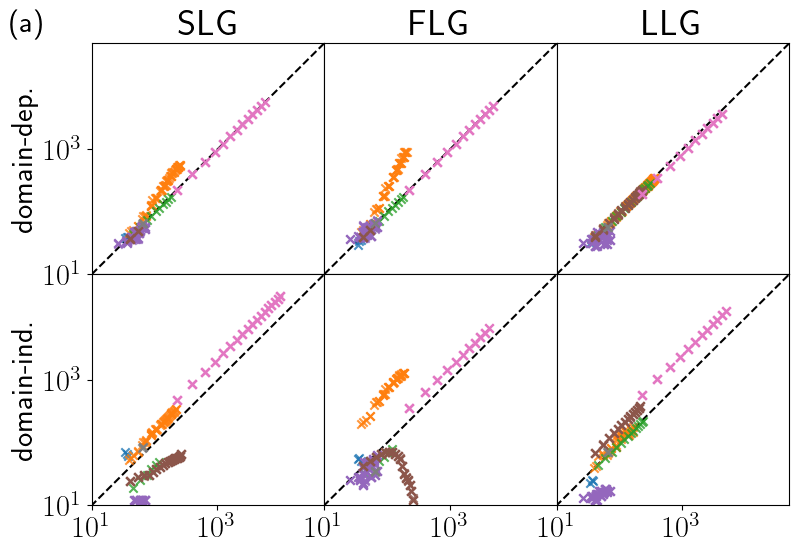

<Figure size 640x480 with 0 Axes>

In [17]:
SIZE = 3
AXES_MIN = 1e1
AXES_MAX = 5e4
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(3*SIZE, 2*SIZE))

for j, rep in enumerate(["slg", "flg", "llg"]):
  for i, train_type in enumerate(["dd", "di"]):

    # plotting
    for domain in DOMAINS:
        xs = []
        ys = []

        problem_pddls = os.listdir(f"../dataset/goose/{domain}/test")
        for problem_pddl in problem_pddls:
            problem_name = os.path.basename(problem_pddl).replace(".pddl", "")

            key = (domain, problem_name)
            if key not in h_opt:
                continue
            
            p = 20 if train_type == "di" else 10

            config = best_[(domain, f"{train_type}_{rep}")]
            if config is None:
               config = "max_4"
            config = config.split("_")
            L = config[1]
            aggr = config[0]

            if rep == "llg":
                f = f'aaai24_logs/test/{problem_name}_{train_type}_{rep}_{domain}_L{L}_H64_{aggr}_p{p}.log'
            else:
               f = f"../../aaai-24-goose-logs/goose-submission/{aggr}_{rep}_{train_type}_{L}/{domain}_{problem_name}.log"
            
            x = h_opt[key]
            # assert os.path.exists(f), f
            y = scrape_search_log(f)["first_h"]

            if rep == "flg" and train_type == "di":
               if not os.path.exists(f):
                  print(f)

            xs.append(x)
            ys.append(y)

        
        axs[i,j].scatter(xs, ys, label=domain, marker='x', alpha=0.8)
    axs[i,j].plot([1, AXES_MAX], [1, AXES_MAX], linestyle='dashed', color='k', zorder=0)
    axs[i,j].set_xscale('log')
    axs[i,j].set_yscale('log')
    axs[i,j].set_xlim(left=AXES_MIN, right=AXES_MAX)
    axs[i,j].set_ylim(bottom=AXES_MIN, top=AXES_MAX)
    # axs[i,j].set_aspect('equal')

    if i<1:
       axs[i,j].xaxis.set_visible(False)
    if j>0:
       axs[i,j].yaxis.set_visible(False)
    if i==0:
       axs[i,j].set_title(rep.upper())
    if j==0:
       title = "domain-dep." if train_type=="dd" else "domain-ind."
       axs[i,j].set_ylabel(title)

axs[0,0].text(5e-1, 1.5*AXES_MAX, r"$\text{(a)}$", fontsize=22)
plt.subplots_adjust(hspace=0,wspace=0)
# plt.subplots_adjust(wspace=0.3)
# plt.legend(labelspacing=0.2, handlelength=0.5)
# plt.legend(labelspacing=0.2, handlelength=0.5, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
# plt.tight_layout()
from pathlib import Path
PAPER_DIR = str(Path.home())+"/papers/manuscripts/aaai-24-goose/paper"
PLOT_DIR = f"{PAPER_DIR}/plots"
plt.savefig(f"{PLOT_DIR}/combined-predict-horizontal.pdf", bbox_inches='tight')
plt.show()
plt.clf()

In [18]:
FONT=22

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage{amsmath}',
    "font.size": FONT,
})

SIZE = 3
AXES_MIN = 1e1
HSPACE=0.3
WSPACE=HSPACE

METRIC_MAX={
   "expanded": 1e8,
   "cost": 1e4
}

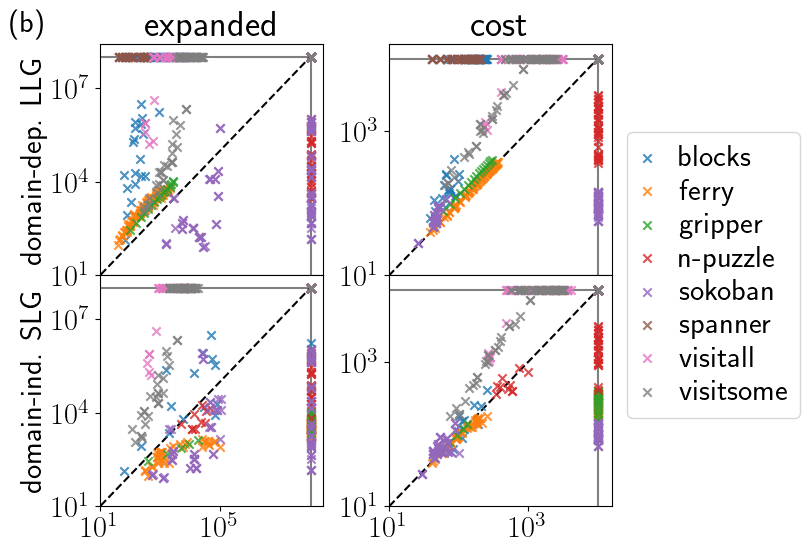

<Figure size 640x480 with 0 Axes>

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2*(SIZE+WSPACE), 2*SIZE))

for j, metric in enumerate(["expanded", "cost"]):
  for i, goose in enumerate([("llg", "dd"), ("slg", "di")]):
    rep, train_type = goose
    AXES_MAX = METRIC_MAX[metric]

    # plotting
    for domain in DOMAINS:
        xs = []
        ys = []

        problem_pddls = os.listdir(f"../dataset/goose/{domain}/test")
        for problem_pddl in problem_pddls:
            problem_name = os.path.basename(problem_pddl).replace(".pddl", "")

            key = (domain, problem_name)
            
            p = 20 if train_type == "di" else 10
            ff_file = f'aaai24_logs/hff/{domain}_{problem_name}.log'

            config = best_[(domain, f"{train_type}_{rep}")]
            if config is None:
               config = "max_4"
            config = config.split("_")
            L = config[1]
            aggr = config[0]

            if rep == "llg":
                f = f'aaai24_logs/test/{problem_name}_{train_type}_{rep}_{domain}_L{L}_H64_{aggr}_p{p}.log'
            else:
                f = f"../../aaai-24-goose-logs/goose-submission/{aggr}_{rep}_{train_type}_{L}/{domain}_{problem_name}.log"

            x = scrape_search_log(f)[metric]
            y = scrape_search_log(ff_file)[metric]

            if x==-1: x = AXES_MAX
            if y==-1: y = AXES_MAX;

            xs.append(x)
            ys.append(y)

        
        axs[i,j].scatter(xs, ys, label=domain, marker='x', alpha=0.8)
    axs[i,j].plot([1, AXES_MAX], [1, AXES_MAX], linestyle='dashed', color='k', zorder=0)
    axs[i,j].plot([AXES_MAX, AXES_MAX], [1, AXES_MAX], color='k', zorder=0, alpha=0.5)
    axs[i,j].plot([1, AXES_MAX], [AXES_MAX, AXES_MAX], color='k', zorder=0, alpha=0.5)
    axs[i,j].set_xscale('log')
    axs[i,j].set_yscale('log')
    axs[i,j].set_xlim(left=AXES_MIN)
    axs[i,j].set_ylim(bottom=AXES_MIN)
    # axs[i,j].set_aspect('equal')

    if i<1:
       axs[i,j].xaxis.set_visible(False)
    # if j>0:
    #    axs[i,j].yaxis.set_visible(False)
    if j==0:
       title = "domain-dep." if train_type=="dd" else "domain-ind."
       axs[i,j].set_ylabel(title+" "+rep.upper())
    if i==0:
       axs[i,j].set_title(metric)

axs[0,0].text(1e-2, 6e8, r"$\text{(b)}$", fontsize=22)
plt.subplots_adjust(hspace=0, wspace=WSPACE)
# plt.legend(labelspacing=0.2, handlelength=0.5)
plt.legend(labelspacing=0.2, handlelength=0.5, loc='center left', bbox_to_anchor=(1, 1), prop={'size': FONT})
# plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/combined-exp-and-cost.pdf", bbox_inches='tight')
plt.show()
plt.clf()

### Expanded

In [20]:
df = get_selected_param_df()
df = df[df["solved"] == 1]
for domain in DOMAINS:
    domain_df = df[df["domain"] == domain]
    fig = px.scatter(domain_df, x="problem", y="expanded", color="model", log_y=True, title=domain)
    fig.show()

TypeError: get_selected_param_df() missing 2 required positional arguments: 'L' and 'A'